In [112]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal as sig
from scipy.fftpack import fft
from math import pi

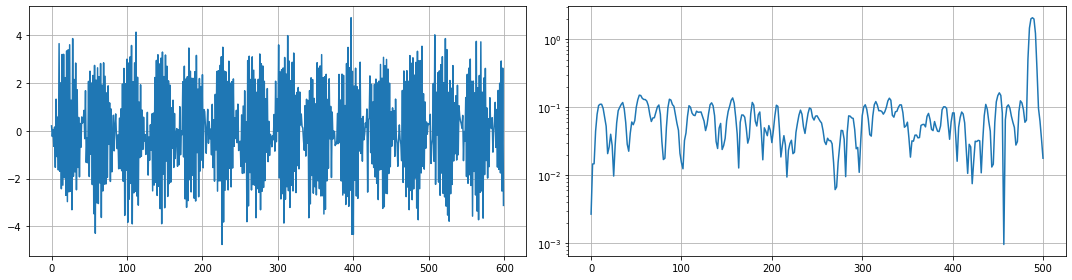

In [113]:
fs = 1e3
N = 600
amp = 2*np.sqrt(2)
freq = 512
noise = 0.001*fs/2
time = np.arange(N)/fs
x = amp*np.sin(2*np.pi*freq*time)
x += np.random.normal(scale=np.sqrt(noise),size=time.shape) # chanel A
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(x)
plt.grid()
f1 , psdx = sig.welch(x,fs,'flattop',1024,scaling='spectrum')
plt.subplot(122)
plt.semilogy(f1,np.sqrt(psdx))
plt.tight_layout()
plt.grid()

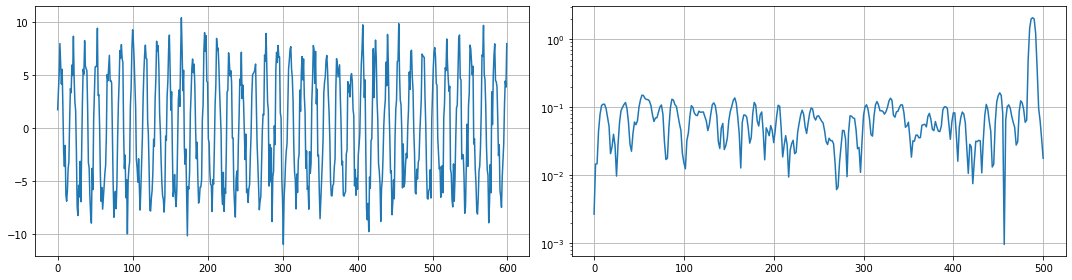

In [114]:
amp = 5*np.sqrt(2)
freq = 62.1
noise = 0.005*fs/2
time = np.arange(N)/fs
y = amp*np.sin(2*np.pi*freq*time)
y += np.random.normal(scale=np.sqrt(noise),size=time.shape) # chanel A
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(y)
plt.grid()
f2 , Pyy = sig.welch(x,fs,'flattop',1024,scaling='spectrum')
plt.subplot(122)
plt.semilogy(f2,np.sqrt(Pyy))
plt.tight_layout()
plt.grid()

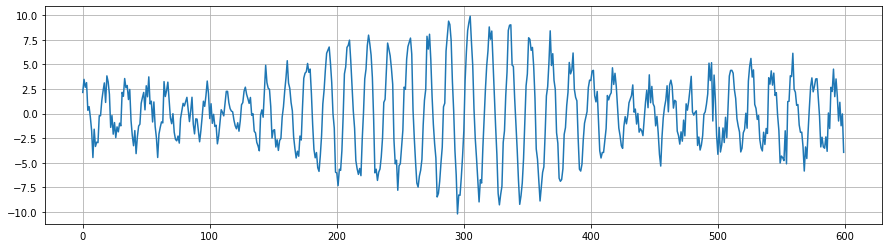

In [115]:
# Wiener Filter
f,Pxx = sig.csd(x,x,nperseg = 256)
f,Pyx = sig.csd(y,x,nperseg = 256)
H = Pyx/Pxx
H = H*np.exp(-1j*2*np.pi/len(H)*np.arange(len(H))*(len(H)//2))
h = np.fft.irfft(H)
plt.figure(figsize=(15,4))
OP_y = np.convolve(x,h,mode='same')
plt.plot(OP_y)
plt.grid()

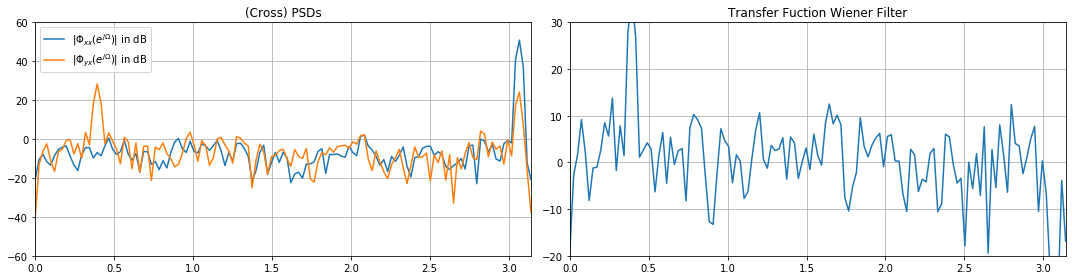

In [116]:
#cross PSD plot
t1 = np.linspace(0,np.pi,num=len(H))
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(t1,20*np.log10(np.abs(0.5*Pxx)), label=r'$| \Phi_{xx}(e^{j \Omega}) |$ in dB')
plt.plot(t1,20*np.log10(np.abs(0.5*Pyx)), label=r'$| \Phi_{yx}(e^{j \Omega}) |$ in dB')
plt.title('(Cross) PSDs')
plt.legend()
plt.axis([0, np.pi, -60, 60])
plt.grid()

# Wiener Filter Transfer Fuction plot
plt.subplot(122)
plt.plot(t1,20*np.log10(np.abs(H)))
plt.title('Transfer Fuction Wiener Filter')
plt.axis([0, np.pi, -20, 30])
plt.grid()
plt.tight_layout()

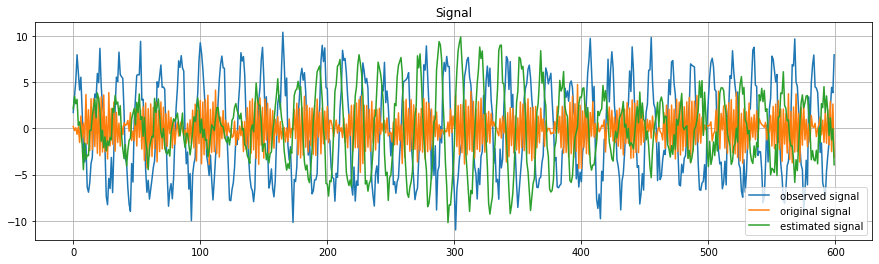

In [117]:
# Signal Comparison Plot
plt.figure(figsize=(15,4))
plt.plot(y, label=r' observed signal')
plt.plot(x, label=r' original signal')
plt.plot(OP_y, label=r' estimated signal')
plt.title('Signal')
plt.legend()
plt.grid()
